In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Dataset_w6.xlsx")
df.head()

,country,Region,Surface area (km2),Population in thousands (2017),GDP per capita (current US$),Agricultural production index,International trade: Imports (million US$)
0,Afghanistan,SouthernAsia,652864,35530,623.2,125,3568
1,Albania,SouthernEurope,28748,2930,3984.2,134,4669
2,Algeria,NorthernAfrica,2381741,41318,4154.1,160,47091
3,Angola,MiddleAfrica,1246700,29784,4714.1,175,8790
4,Antigua and Barbuda,Caribbean,442,102,14764.5,88,491


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   country                                     196 non-null    object 
 1   Region                                      196 non-null    object 
 2   Surface area (km2)                          196 non-null    int64  
 3   Population in thousands (2017)              196 non-null    int64  
 4   GDP per capita (current US$)                196 non-null    float64
 5   Agricultural production index               196 non-null    int64  
 6   International trade: Imports (million US$)  196 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 10.8+ KB


In [4]:
df.describe()

,Surface area (km2),Population in thousands (2017),GDP per capita (current US$),Agricultural production index,International trade: Imports (million US$)
count,1.960000e+02,1.960000e+02,196.000000,196.000000,1.960000e+02
mean,6.787071e+05,3.796658e+04,13727.343367,117.066327,7.996138e+04
std,1.914200e+06,1.434228e+05,18995.593914,25.521247,2.340416e+05
min,2.600000e+01,5.000000e+00,144.500000,34.000000,1.200000e+01
25%,2.084900e+04,1.462000e+03,1840.725000,102.000000,2.162500e+03
50%,1.136275e+05,7.677500e+03,5463.450000,114.000000,8.255500e+03
75%,5.077380e+05,2.624075e+04,15849.550000,133.250000,4.612275e+04
max,1.709825e+07,1.409517e+06,100160.800000,199.000000,2.249661e+06


In [5]:
df.isnull().sum()

country                                       0
Region                                        0
Surface area (km2)                            0
Population in thousands (2017)                0
GDP per capita (current US$)                  0
Agricultural production index                 0
International trade: Imports (million US$)    0
dtype: int64

# 1) Finding No of countries present in the dataset.

In [6]:
cc = df["country"].count()

print('Total number of countries in the data set is :',cc)

Total number of countries in the data set is : 196


* So, there are `196` Countries in our data set.

# 2) Examining the data using visualizations.

#### Extracting & Reassigning the extracted data under a new variable name.

In [7]:
pop_top10 = df.sort_values("Population in thousands (2017)", ascending= False).head(10)

In [8]:
gdp_top6 = df.sort_values("GDP per capita (current US$)",ascending= False).head(6)

### Plotting the Graph to show 10 most populous countries

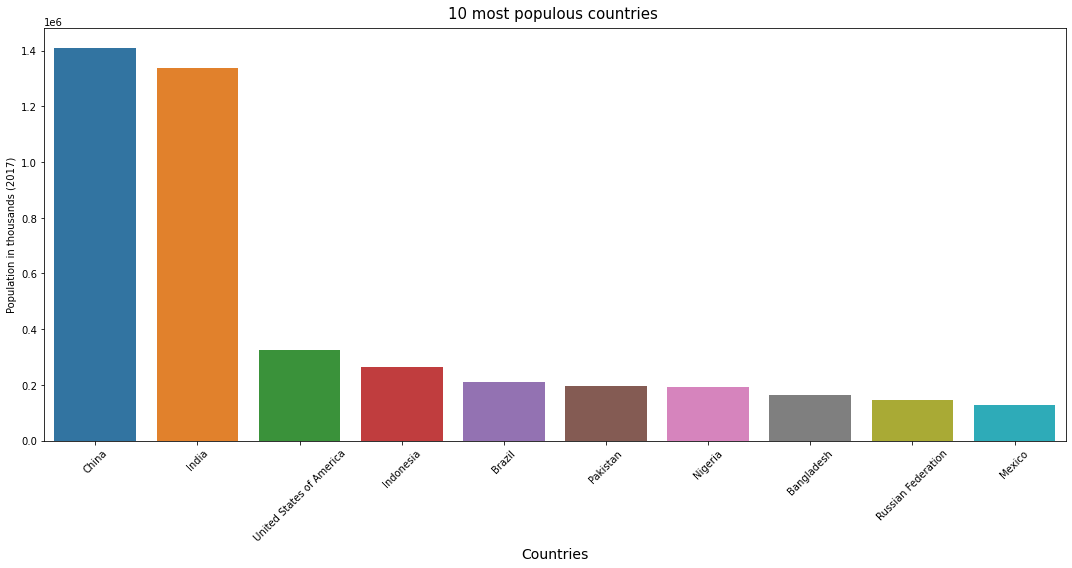

In [9]:
plt.figure(figsize=(15,8))
sns.barplot(data = pop_top10,x = "country",y = "Population in thousands (2017)",)
plt.title("10 most populous countries ", fontsize = 15, pad = 10)
plt.xlabel("Countries", fontsize = 14)
plt.xticks(rotation=45)
plt.tight_layout()

###### 

### Showing the Top 6 Countries according to GDP

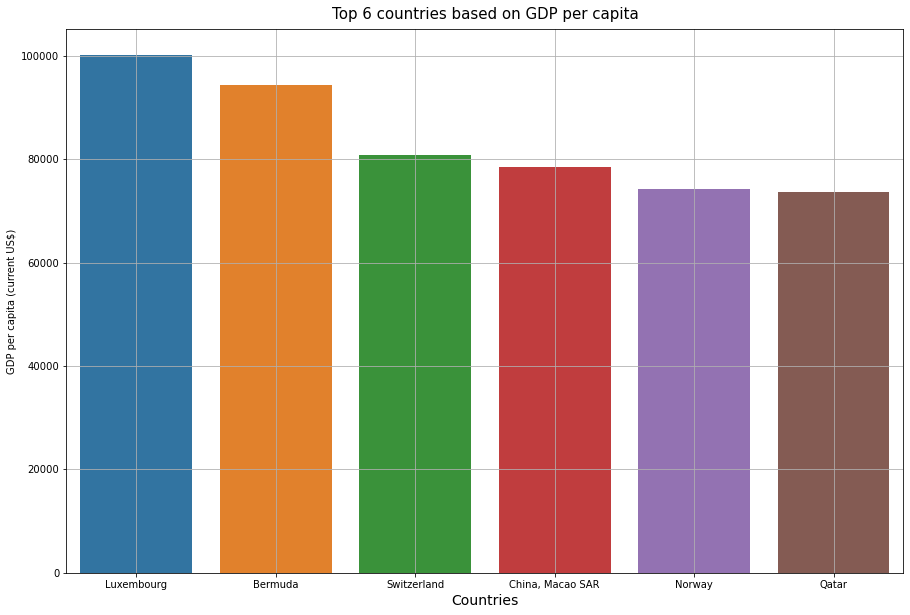

In [10]:
plt.figure(figsize=(15,10))
sns.barplot(data = gdp_top6,x = "country",y = "GDP per capita (current US$)",)
plt.title("Top 6 countries based on GDP per capita", fontsize = 15, pad = 10)
plt.xlabel("Countries", fontsize = 14)
plt.grid()
plt.show()

<Figure size 720x720 with 0 Axes>

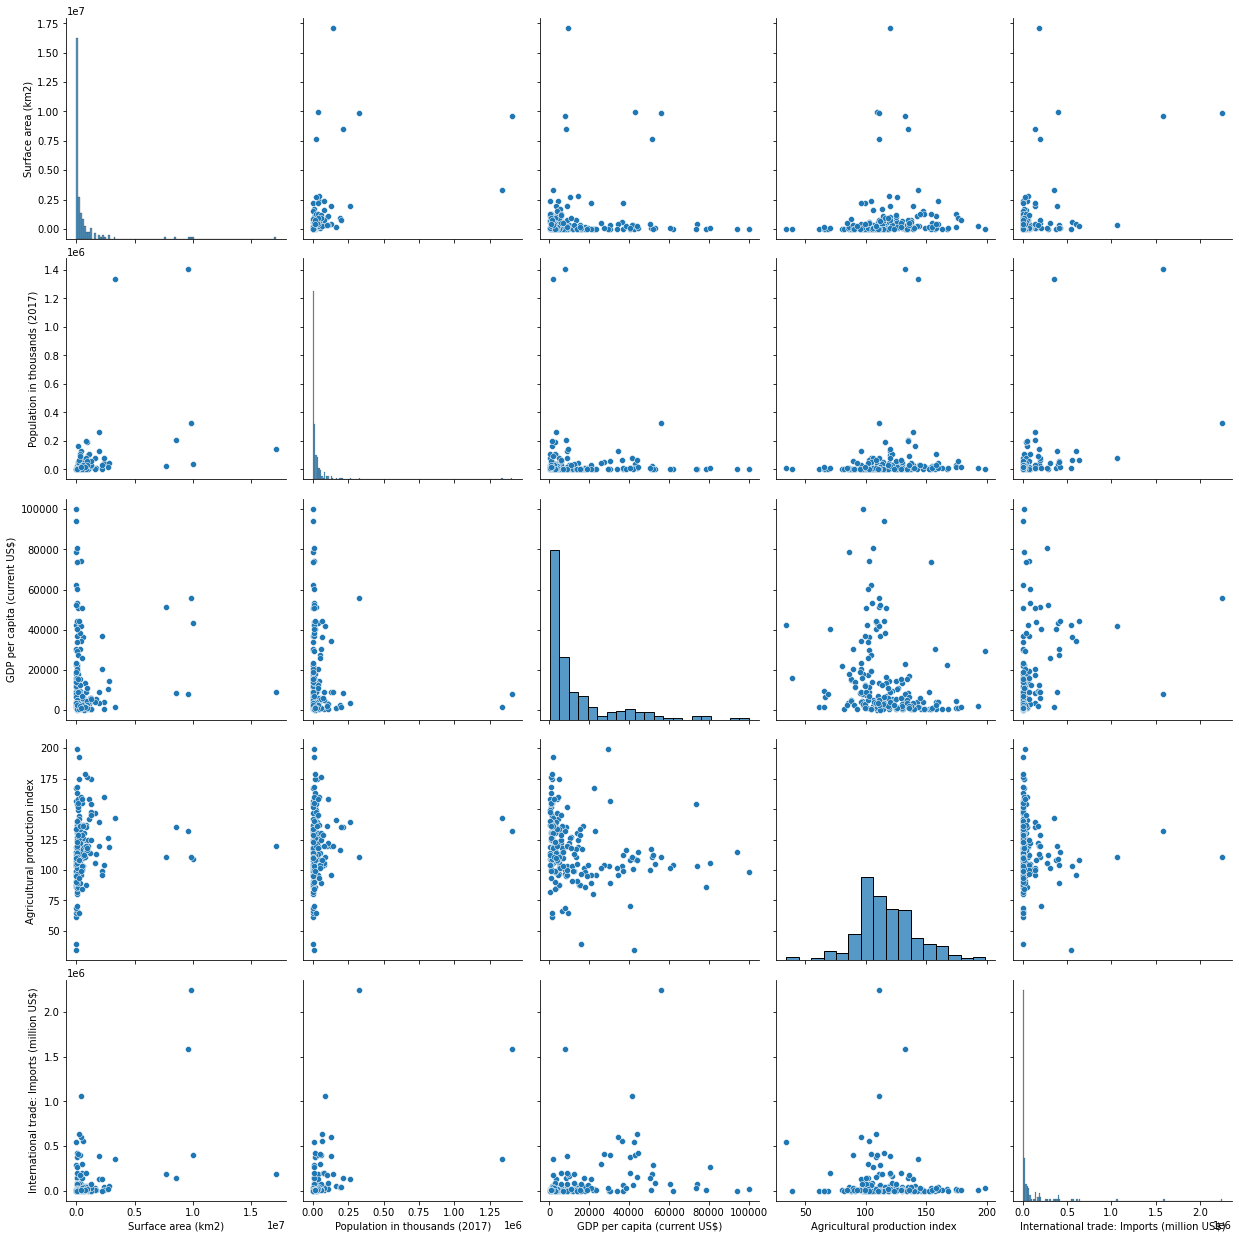

In [11]:
plt.figure(figsize=(10,10))
sns.pairplot(df,height = 3.5)

##### 

##### 

# 3) Examining the number of countries with respect to their region:

In [12]:
#Grouping the dataset by regions and then counting the counties in each region

region_data = df.groupby("Region")[["country"]].count()
region_data

,country
Region,
Caribbean,16
CentralAmerica,8
CentralAsia,5
EasternAfrica,17
EasternAsia,7
EasternEurope,10
Melanesia,5
Micronesia,4
MiddleAfrica,9


#### Here , we can see the number of countries in a particular region

###### 

# 4.a) Finding the Regionwise GDP mean

In [13]:
# Finding the Regionwise GDP mean
region_data1 = df.groupby("Region")[["GDP per capita (current US$)"]].mean()
#Sorting the data & showing just the highest average GDP
region_data1 = region_data1.sort_values("GDP per capita (current US$)", ascending = False).head(1)
region_data1

,GDP per capita (current US$)
Region,
NorthernAmerica,57659.0


> `Northern America` is the region with Highest average GDP($).

# 4.b) Finding the region with the highest International trade: Imports (million US$)

In [14]:
# Finding the Regionwise trade: Imports mean

region_trade_imports = df.groupby("Region")[["International trade: Imports (million US$)"]].mean()
Top_reg_importer = region_trade_imports.sort_values("International trade: Imports (million US$)", ascending=False).head(1)
Top_reg_importer

,International trade: Imports (million US$)
Region,
NorthernAmerica,663552.25


> `Northern America` is the region with the highest average International trade: Imports 

##### 

# 5) Finding the Region which is more consistant w.r.t GDP per capita (current US$

In [15]:
# Finding the Standard deviation across regions
gdp_consist = df.groupby(["Region"])["GDP per capita (current US$)"].std()
gdp_consist.nsmallest(1)

Region
WesternAfrica    815.095399
Name: GDP per capita (current US$), dtype: float64

> `Western Africa` is the most consistant amongst the region in terms of GDP